## **Superstore Sales Analysis**
## *Problem Statement*

Retail companies face challenges in managing profitability and efficiency across various geographies, categories, and customer segments. This analysis aims to analyze historical sales data from a Superstore to uncover insights that can:

- Improve regional sales performance

- Identify profitable and loss-making categories

- Optimize discount strategies

- Guide decision-making for better logistics and marketing

**Import necessary libraries**

- This is the necessary step while initializing the ML model using python

- Importin necessary libraries like:-

- pandas for data manipulation(eg: loading the dataset, describing, getting shape of the dataset, etc...)

- numpy for numerical calculations 

- matplotlib and seaborn both for visualizing the data analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [56]:
df = pd.read_csv(r"C:\Users\Karth\Downloads\Machine learning\Datasets\Sample - Superstore.csv", encoding='unicode_escape')


In [57]:
##Show the starting few rows of dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Purpose:** Displays the first 5 rows of the DataFrame.

**Why use:** Quick overview of the data structure.

**Dataset Overview**

In [58]:
##return how many rows and columns 
df.shape

(9994, 21)

**Purpose:** Returns a tuple representing the dataset’s shape.

**Output:** (rows, columns)

**Why use:** Know the size of your dataset.

In [59]:
#return the information such as data type of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Purpose:** Summary of the dataset:

-Number of non-null values

-Column names

-Data types (int, float, object)

-Memory usage

**Why use:** Check data types & missing values.

In [60]:
#Summary of statistics of the numerical columns
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Purpose:** Summary statistics of numerical columns only

**Includes:** count, mean, std, min, 25%, 50%, 75%, max

**Why use:** Understand distribution and spread of numeric data.

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


**Purpose:** Transposed version of describe()

**Why use:** Easier to read when many features

In [62]:
## Transpose the table and only for columns with datatype object
df.describe(include=[object]).T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


**This part tells Pandas to:**

 Generate summary statistics (like count, unique, top, freq)
 
 Only for columns with data type object (usually used for strings like names, categories, etc.).

In [63]:
##Return the columns 
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## **Data cleaning**

In [64]:
##Check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Purpose:** Checks for missing (null) values column-wise

**Why use:** Identify which columns need cleaning

In [65]:
##Check for duplicates
df.duplicated().sum()

np.int64(0)

**Purpose:** Tells how many duplicate rows exist

**Why use:** Helps in cleaning duplicate data

## **Data Reduction**

This dataset contains information such as Row ID, Postal Code, Product Name, and detailed order tracking that may not be needed for high-level analysis. These columns:

-Do not provide useful insights

-Increase dataset size unnecessarily

-May distract from meaningful analysis

In [66]:
df.drop(['Row ID', 'Postal Code', 'Product ID', 'Customer ID'], axis=1, inplace=True)


In [67]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [68]:
#convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


Converts object (string) type date columns to datetime64[ns]

- Required for time-based operations like:

- Extracting year/month/day

- Calculating delivery duration

- Filtering by date

- Time-series plots

In [69]:
df.dtypes[['Order Date', 'Ship Date']]

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [70]:
##Check for Columns with Low Variance

df.nunique().sort_values()

Country             1
Segment             3
Category            3
Ship Mode           4
Region              4
Discount           12
Quantity           14
Sub-Category       17
State              49
City              531
Customer Name     793
Order Date       1237
Ship Date        1334
Product Name     1850
Order ID         5009
Sales            5825
Profit           7287
dtype: int64

In [71]:
##choose to drop Country because it has the same value for all rows.
df.drop(['Country'], axis=1, inplace=True)

In [72]:
df.shape

(9994, 16)

In [73]:
df.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## **Feature Engineering**
The process of creating new features or modifying existing ones to improve the performance and interpretability of the analysis. In EDA, this step helps reveal deeper patterns in the dataset.

**Create Shipping Duration Feature**

To measure how long it took for a product to be delivered
This can help evaluate the efficiency of different shipping modes or regions.

In [74]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days


In [75]:
df[['Order Date', 'Ship Date', 'Shipping_Days']].head()


,Order Date,Ship Date,Shipping_Days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


 **Extract Date Components (Year, Month, Day)**

This helps us identify time-based trends like monthly peaks in sales or seasonal losses.

In [76]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day


In [77]:
df[['Order Date', 'Order_Year', 'Order_Month', 'Order_Day']].head()


,Order Date,Order_Year,Order_Month,Order_Day
0,2016-11-08,2016,11,8
1,2016-11-08,2016,11,8
2,2016-06-12,2016,6,12
3,2015-10-11,2015,10,11
4,2015-10-11,2015,10,11


***Add Profit-to-Sales Ratio***

This gives a normalized metric of how profitable each sale was.

In [78]:
df['Profit_Sales_Ratio'] = df['Profit'] / df['Sales']
df['Profit_Sales_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Profit_Sales_Ratio'].fillna(0, inplace=True)


C:\Users\Karth\AppData\Local\Temp\ipykernel_18160\2340342437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profit_Sales_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Karth\AppData\Local\Temp\ipykernel_18160\2340342437.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [79]:
df[['Sales', 'Profit', 'Profit_Sales_Ratio']].head()


,Sales,Profit,Profit_Sales_Ratio
0,261.9600,41.9136,0.1600
1,731.9400,219.5820,0.3000
2,14.6200,6.8714,0.4700
3,957.5775,-383.0310,-0.4000
4,22.3680,2.5164,0.1125


***Categorize Profitability***

Creates labels (e.g., High Profit, Loss) that help us segment the data.

In [80]:
def categorize_profit(x):
    if x > 50:
        return 'High Profit'
    elif x < 0:
        return 'Loss'
    else:
        return 'Moderate Profit'

df['Profit_Category'] = df['Profit'].apply(categorize_profit)


In [81]:
df[['Profit', 'Profit_Category']].head()


,Profit,Profit_Category
0,41.9136,Moderate Profit
1,219.5820,High Profit
2,6.8714,Moderate Profit
3,-383.0310,Loss
4,2.5164,Moderate Profit


In [82]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,...,Sales,Quantity,Discount,Profit,Shipping_Days,Order_Year,Order_Month,Order_Day,Profit_Sales_Ratio,Profit_Category
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,...,261.9600,2,0.00,41.9136,3,2016,11,8,0.1600,Moderate Profit
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,...,731.9400,3,0.00,219.5820,3,2016,11,8,0.3000,High Profit
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,...,14.6200,2,0.00,6.8714,4,2016,6,12,0.4700,Moderate Profit
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,...,957.5775,5,0.45,-383.0310,7,2015,10,11,-0.4000,Loss
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,...,22.3680,2,0.20,2.5164,7,2015,10,11,0.1125,Moderate Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,...,25.2480,3,0.20,4.1028,2,2014,1,21,0.1625,Moderate Profit
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,...,91.9600,2,0.00,15.6332,5,2017,2,26,0.1700,Moderate Profit
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,...,258.5760,2,0.20,19.3932,5,2017,2,26,0.0750,Moderate Profit
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,...,29.6000,4,0.00,13.3200,5,2017,2,26,0.4500,Moderate Profit


**Create Revenue Grouping Buckets**

Helps analyze customer or product behavior based on how much revenue they generate.

In [83]:
df['Revenue_Bin'] = pd.qcut(df['Sales'], q=4, labels=["Low", "Medium", "High", "Very High"])


In [84]:
df[['Sales', 'Revenue_Bin']].head()


,Sales,Revenue_Bin
0,261.9600,Very High
1,731.9400,Very High
2,14.6200,Low
3,957.5775,Very High
4,22.3680,Medium


**Region-Segment Combination Feature**

Sometimes interactions between two categorical variables reveal deeper business logic.

In [85]:
df['Region_Segment'] = df['Region'] + ' - ' + df['Segment']


In [86]:
df[['Region', 'Segment', 'Region_Segment']].head()


,Region,Segment,Region_Segment
0,South,Consumer,South - Consumer
1,South,Consumer,South - Consumer
2,West,Corporate,West - Corporate
3,South,Consumer,South - Consumer
4,South,Consumer,South - Consumer


**Check for High Discounts**

Flag orders with excessive discounts which could be a reason for loss.

In [87]:
df['High_Discount'] = df['Discount'].apply(lambda x: 1 if x > 0.3 else 0)


In [88]:
df[['Discount', 'High_Discount']].head()


,Discount,High_Discount
0,0.00,0
1,0.00,0
2,0.00,0
3,0.45,1
4,0.20,0


**New Features**

In [89]:
df[['Shipping_Days', 'Order_Year', 'Profit_Sales_Ratio', 'Profit_Category', 
    'Revenue_Bin', 'Region_Segment', 'High_Discount']].head()


,Shipping_Days,Order_Year,Profit_Sales_Ratio,Profit_Category,Revenue_Bin,Region_Segment,High_Discount
0,3,2016,0.1600,Moderate Profit,Very High,South - Consumer,0
1,3,2016,0.3000,High Profit,Very High,South - Consumer,0
2,4,2016,0.4700,Moderate Profit,Low,West - Corporate,0
3,7,2015,-0.4000,Loss,Very High,South - Consumer,1
4,7,2015,0.1125,Moderate Profit,Medium,South - Consumer,0


In [90]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Days', 'Order_Year', 'Order_Month', 'Order_Day',
       'Profit_Sales_Ratio', 'Profit_Category', 'Revenue_Bin',
       'Region_Segment', 'High_Discount'],
      dtype='object')

In [91]:
df.shape

(9994, 25)

### **EDA**
Exploratory Data Analysis (EDA) is the first step in any data science or machine learning project.

It means:

"Exploring the data to understand what it contains, what problems it has, and what patterns we can find."

 **Goals of EDA:**
 
 Understand the structure of the data (rows, columns, types)

 Detect missing values

 Find outliers or unusual data

 See the distribution of values (like histograms, countplots)

 Understand relationships between features (correlation, scatter plots)

 Summarize basic statistics (mean, median, mode, etc.)



## ***Univariate Analysis***

Univariate analysis is the simplest form of data analysis where we examine and describe a single variable at a time. Its main goal is to understand the distribution, central tendency (mean, median, mode), spread (standard deviation, range), and outliers of that variable. It often uses visualizations like histograms, box plots, or bar charts to summarize data.

In [92]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Days', 'Order_Year', 'Order_Month', 'Order_Day',
       'Profit_Sales_Ratio', 'Profit_Category', 'Revenue_Bin',
       'Region_Segment', 'High_Discount'],
      dtype='object')

In [93]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

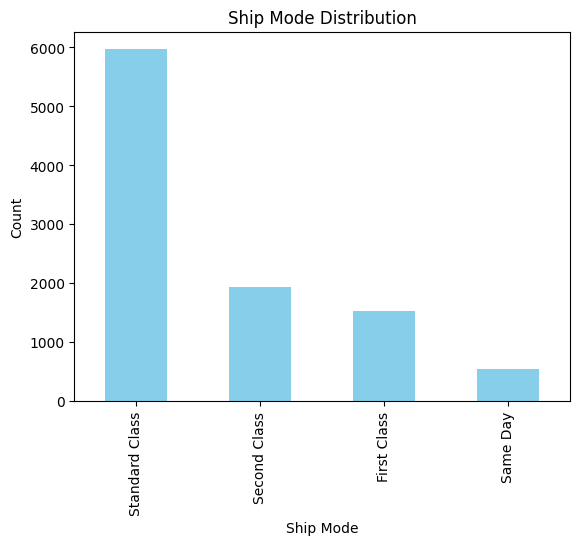

In [94]:
##Ship Mode Distribution
df['Ship Mode'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Ship Mode Distribution")
plt.ylabel("Count")
plt.show()


Standard Class dominates all shipping methods, with nearly 6000 orders — suggesting it is the default or most cost-effective option.

Second Class and First Class are moderately used, indicating usage in premium or urgent delivery cases.

Same Day delivery is the least used, likely due to higher cost or limited availability in certain regions.

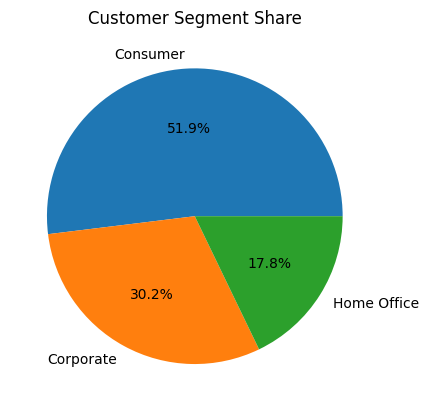

In [95]:
##Customer Segment Distribution
df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Segment Share")
plt.ylabel("")
plt.show()


Consumer segment holds the largest share (~52%) of all customers, emphasizing the importance of individual buyers in business.

Corporate customers contribute around 30% — a significant secondary market.

Home Office has the least proportion (~18%), showing a smaller but consistent niche group.

**Which are the Most Ordered Sub-Categories ?**

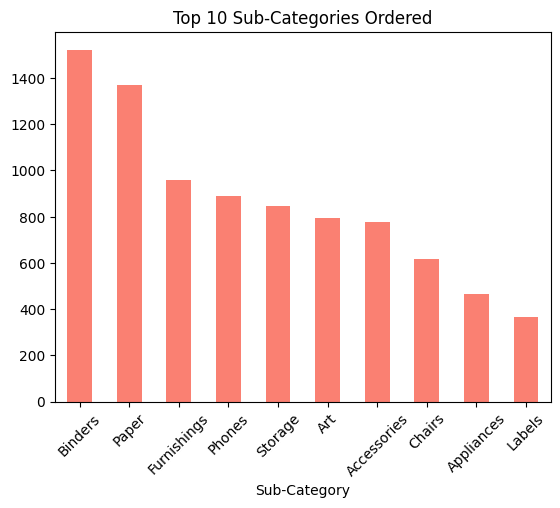

In [96]:

df['Sub-Category'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Sub-Categories Ordered")
plt.xticks(rotation=45)
plt.show()


- Binders and Paper are the most frequently ordered items, indicating everyday office utility demand.

- Phones, Storage, and Furnishings follow — often high-ticket and essential items.

- Lower frequency in Appliances and Labels may imply these are either expensive, niche, or bulk items.

## ***Bivariate Analysis***

Bivariate analysis involves analyzing two variables together to understand the relationship between them. This helps identify whether one variable has an effect or pattern with respect to the other. Common tools for bivariate analysis include scatter plots, correlation coefficients, and cross-tabulations. While univariate analysis focuses on one variable in isolation, bivariate analysis helps uncover interactions or trends between two variables.

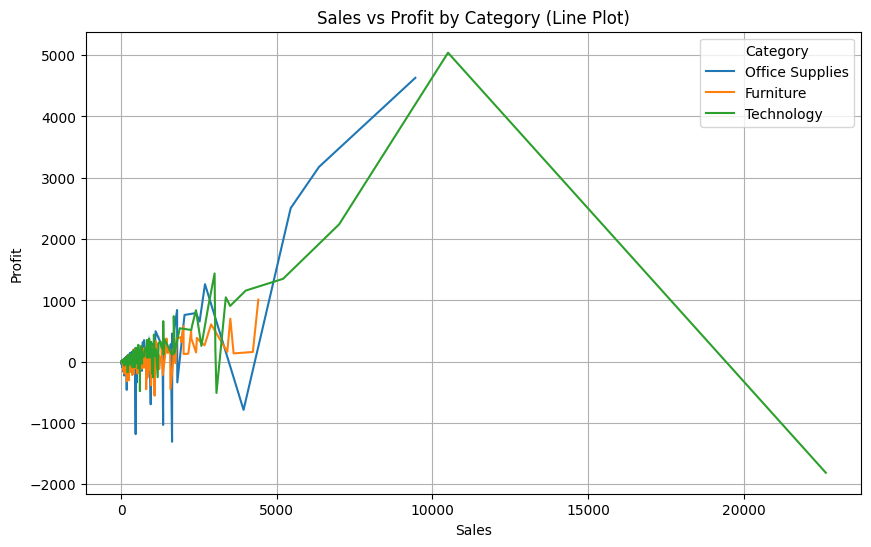

In [97]:
# Sort data by Sales to avoid zig-zag lines in line plot
plt.figure(figsize=(10,6))
df_sample = df_sorted.sample(2000)  # pick 2000 random rows
sns.lineplot(data=df_sample, x='Sales', y='Profit', hue='Category')

plt.title("Sales vs Profit by Category (Line Plot)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title='Category')
plt.grid(True)
plt.show()



- Technology shows wide fluctuations in both sales and profit—high potential but volatile.
- Office Supplies display steady performance with moderate profit and sales.
- Furniture has a narrow range—low variability in both sales and profit, possibly indicating limited growth.


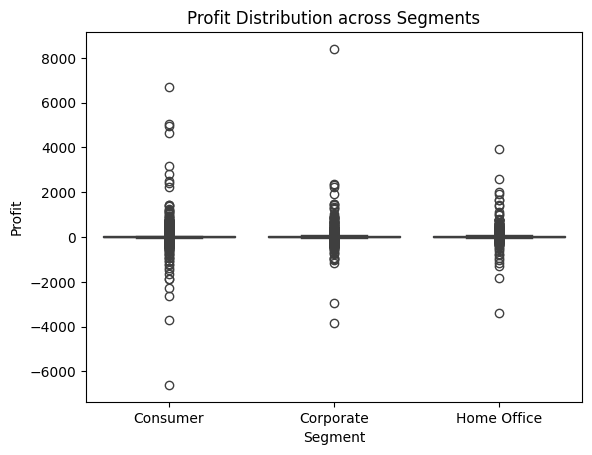

In [98]:
##Segment vs Profit
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title("Profit Distribution across Segments")
plt.show()


- All three segments show a wide spread in profit, with some extreme outliers (both positive and negative).

- Consumer segment has slightly better concentration around higher profit values.

- Corporate has some of the highest profits but also the most losses.

- Home Office shows a narrow interquartile range (IQR), meaning consistent mid-level profits but lower outliers.



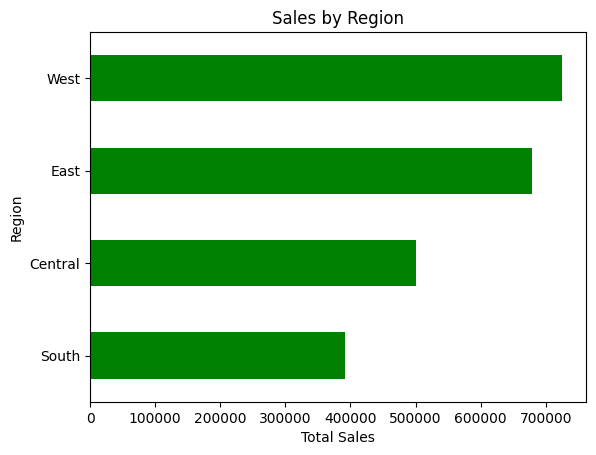

In [99]:
##Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='barh', color='green')
plt.title("Sales by Region")
plt.xlabel("Total Sales")
plt.show()


- West and East regions are top performers in total sales.

- Central performs moderately, but may need strategic boosts.

- South has the lowest sales — indicating potential for regional marketing and delivery improvements.

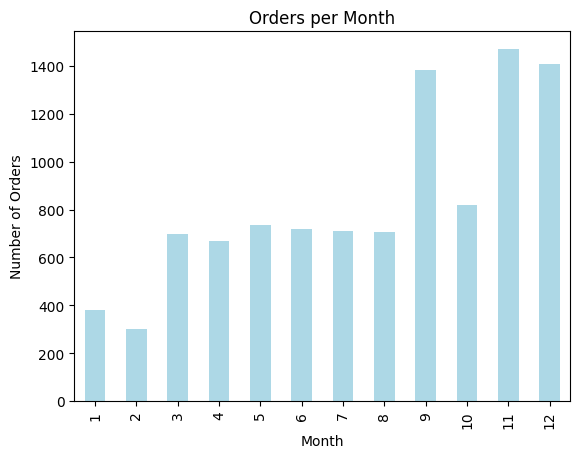

In [100]:
# Order Analysis
# Orders per month
order_counts = df['Order_Month'].value_counts().sort_index()
order_counts.plot(kind='bar', title='Orders per Month', color='lightblue')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()


- November and December have peak order counts — likely due to holiday shopping (Black Friday, Christmas).

- September and October also show a spike, potentially tied to year-end business purchases.

- Lowest orders are seen in January and February, possibly due to post-holiday slowdowns.

### **KPIs**

## *Net sales*

In [101]:
print("Total Sales:", df['Sales'].sum())

Total Sales: 2297200.8603


## *Total Profit*

In [102]:
print("Total Profit:", df['Profit'].sum())

Total Profit: 286397.0217


## *Total quantity sold*

In [103]:
print("Total Quantity Sold:", df['Quantity'].sum())

Total Quantity Sold: 37873


## *Total orders*

In [104]:
print("Total Orders:", df.shape[0])

Total Orders: 9994


## *Unique Products*

In [105]:
print("Unique Products:", df['Product Name'].nunique())

Unique Products: 1850


## *Unique cities*

In [106]:
print("Unique Cities:", df['City'].nunique())

Unique Cities: 531


**Year and quarter with highest sales**

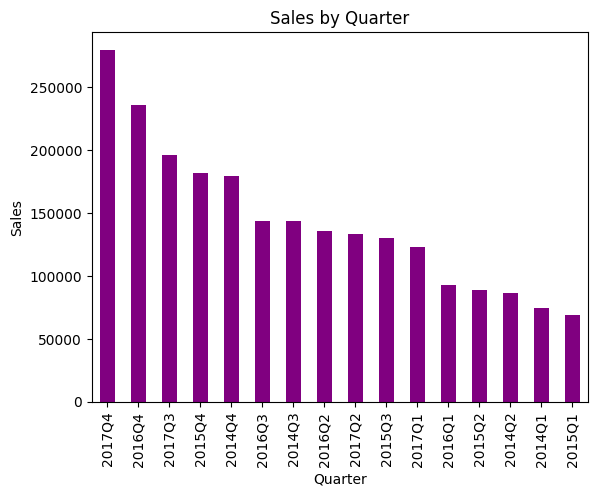

In [107]:
df['Quarter'] = df['Order Date'].dt.to_period('Q')
quarter_sales = df.groupby('Quarter')['Sales'].sum().sort_values(ascending=False)
quarter_sales.plot(kind='bar', color='purple', title='Sales by Quarter')
plt.ylabel('Sales')
plt.xlabel('Quarter')
plt.show()


2017 Q4 shows the highest sales across all quarters — again highlighting the year-end demand boost.

Sales generally increase over the years, with 2016 and 2017 consistently outperforming earlier periods.

Q1 of all years tends to be the lowest-performing, suggesting seasonal lull.

**Sales, Profit, Quantity by Ship Mode**

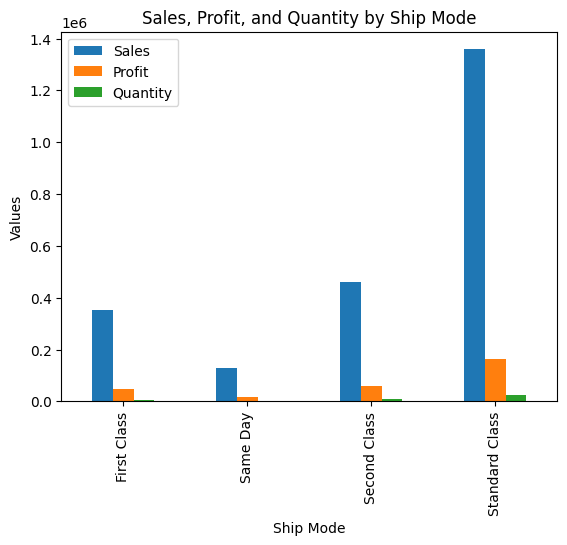

In [108]:

ship_mode_stats = df.groupby('Ship Mode')[['Sales', 'Profit', 'Quantity']].sum()
ship_mode_stats.plot(kind='bar', title='Sales, Profit, and Quantity by Ship Mode')
plt.ylabel('Values')
plt.show()




Standard Class not only leads in sales but also in profit and quantity — proving it’s efficient and profitable.

First Class has better profitability than Second Class, despite fewer orders — possibly due to higher-value items.

Same Day service has lowest profit, possibly due to operational costs outweighing order value.

**Segment-wise Sales and Profit**

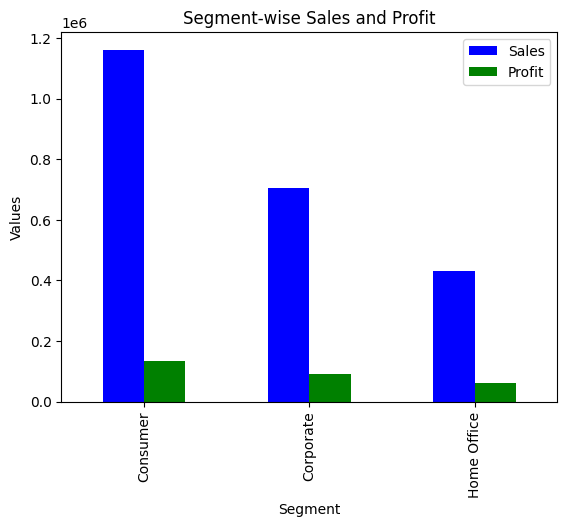

In [109]:
segment_stats = df.groupby('Segment')[['Sales', 'Profit']].sum()
segment_stats.plot(kind='bar', title='Segment-wise Sales and Profit', color=['blue', 'green'])
plt.ylabel('Values')
plt.show()

Consumer segment brings maximum sales and profit, making it the core focus for marketing and promotions.

Corporate performs well, especially in profit, despite lower volume than consumer.

Home Office is the least profitable and lowest in sales — may require strategic push or review.

**Which are the Top Regions, States, Cities by sales and profit ?**

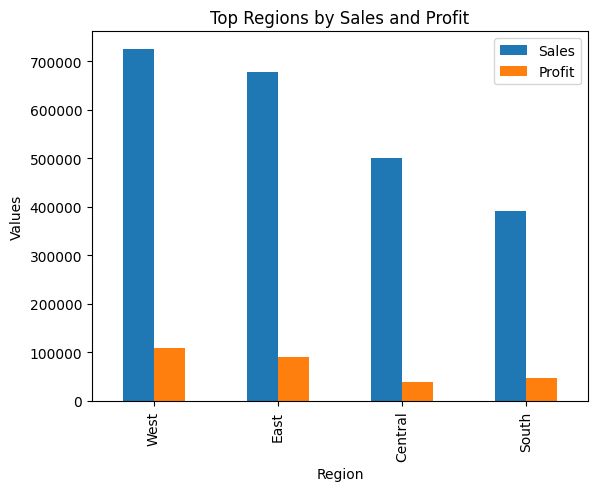

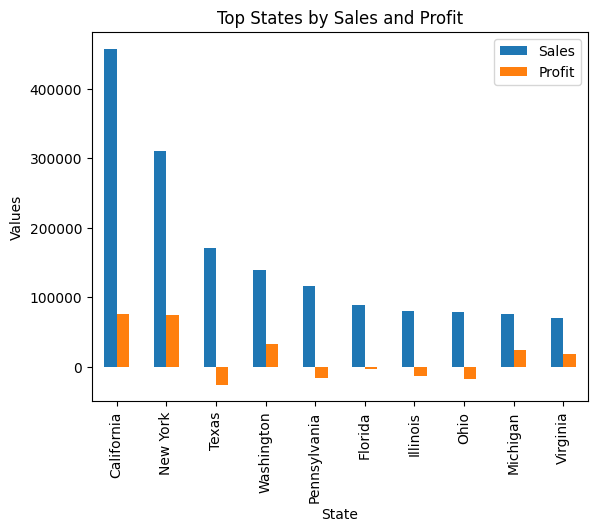

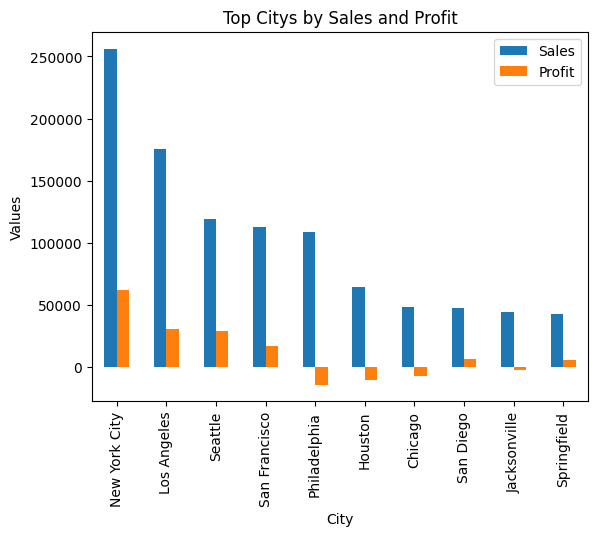

In [110]:
for col in ['Region', 'State', 'City']:
    top = df.groupby(col)[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)
    top.plot(kind='bar', title=f'Top {col}s by Sales and Profit')
    plt.ylabel('Values')
    plt.show()



**Top regions by sales and profit**

- West region leads in both sales and profit, making it the most profitable zone.
- South region lags behind, recording the lowest figures in both categories.
- Sales and profit follow a similar pattern across all regions, indicating proportional performance.


**Top states by sales and profit**

- California tops both sales and profit charts by a wide margin.
- Texas shows a troubling contrast—strong sales but negative profit.
- Most other states (like New York, Washington, and Pennsylvania) have moderate sales paired with consistent positive profit.

**Top cities by sales and profit**

- New York City dominates with the highest sales and profit.
- Springfield ranks lowest in both metrics.
- Most cities show a consistent pattern—higher sales generally mean higher profit, with only slight deviations.




**Which are the Top Product by Sales and Profit ?**

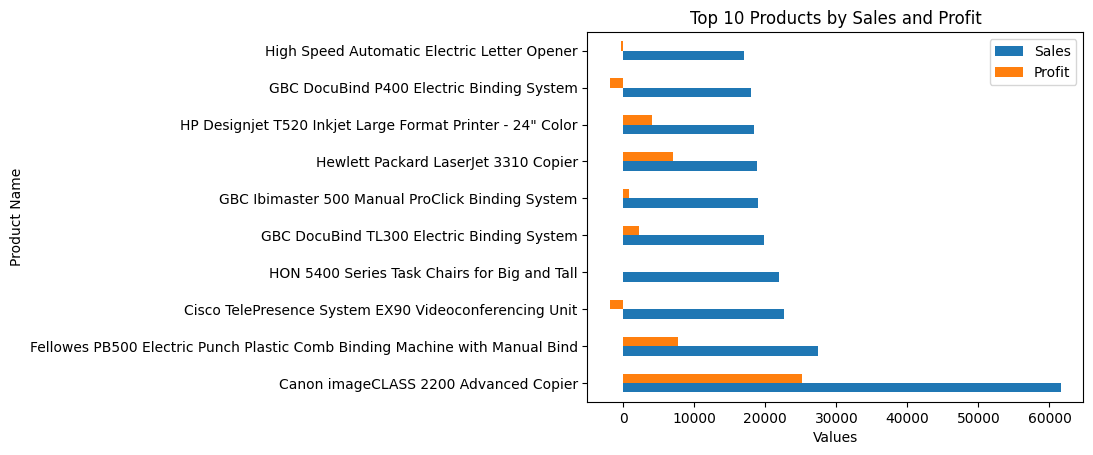

In [111]:
top_product = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)
top_product.plot(kind='barh', title='Top 10 Products by Sales and Profit')
plt.xlabel('Values')
plt.show()



**- Top Performers in Sales:**
-  Canon imageCLASS 2200 Advanced Copier shows the highest sales across all products—but surprisingly, its profit is modest compared to others.

-  HON 5400 Series Task Chairs for Big and Tall has strong sales, yet its profit remains low, indicating possible cost inefficiencies or pricing issues.

-  HP Designjet T520 and Hewlett Packard LaserJet 3310 also generate high sales with moderate profit margins.


- **Top Performers in Profit:**
-  Fellowes PB500 Electric Punch stands out with the highest profit, even though its sales aren't top-tier—suggesting great margins or lower costs.

-  GBC DocuBind P400 and High Speed Electric Letter Opener deliver balanced performance in both sales and profit.


- **Underperformers:**
-  GBC Ibimaster 500 Manual ProClick Binding System struggles on both fronts—low sales and minimal profit.

-  Cisco TelePresence System EX90 sits in the middle range—neither standout nor poor performer, but perhaps not scaling as expected.


- **Interesting Contrasts:**
-  Products like Canon imageCLASS 2200 and HON Task Chairs show that high sales don’t always mean high profit.

-  On the flip side, items like Fellowes PB500 and GBC DocuBind P400 suggest lower sales can still drive strong profit if margins are right.


- **General Trend:**
-  Most products show a positive correlation between sales and profit, but with a few outliers where profitability is driven more by efficiency than volume.



**Discount vs Sales**

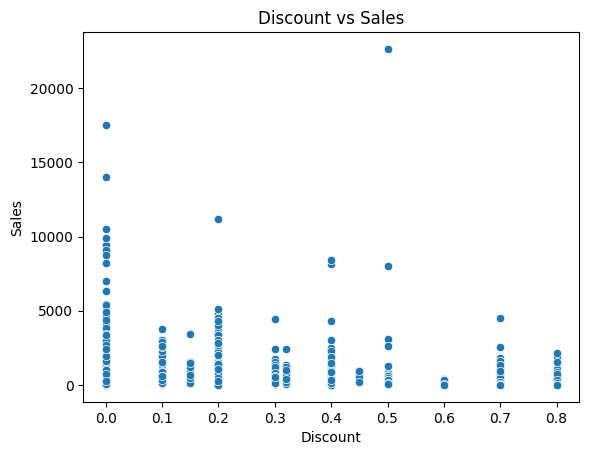

In [112]:
sns.scatterplot(data=df, x='Discount', y='Sales')
plt.title('Discount vs Sales')
plt.show()


- Higher discounts (above 0.3) don't seem to result in significantly higher sales—many high-sales data points actually occur at lower discount levels.

- Sales cluster mostly around discounts between 0.1 and 0.3, suggesting that moderate discounts may be optimal.

- A few outliers show strong sales with minimal or no discount, hinting that pricing isn't the only driver of purchase behavior.


**Discount vs profit**

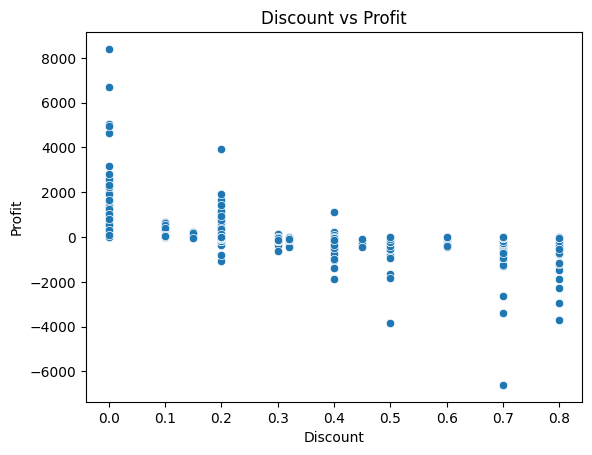

In [113]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()


- Higher Discounts (above 0.3) tend to result in negative profit, indicating that steep discounts may eat into margins or even cause losses.

- Moderate Discounts (around 0.1–0.3) show a mix of outcomes—some data points still show positive profit, suggesting this range might be the sweet spot.

- Low Discounts (below 0.1) correlate more frequently with positive profit, hinting that minimal discounting can still drive profitability.

- There are a few outliers with high profit even at medium discounts, which might reflect high-margin products or bundling strategies.
Let me know if you’d like help identifying the optimal discount strategy based on this trend!


**Which are the Top 5 Best-Selling Products by Quantity**

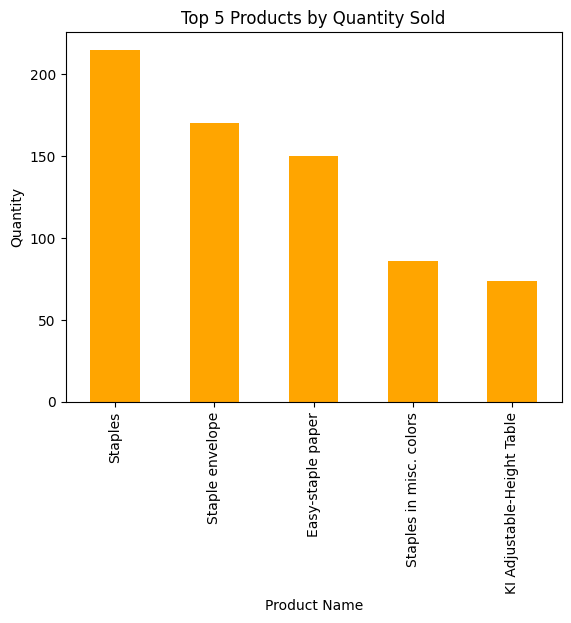

In [114]:
top_qty = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(5)
top_qty.plot(kind='bar', color='orange', title='Top 5 Products by Quantity Sold')
plt.ylabel('Quantity')
plt.show()

**Product Performance Highlights**
- Staples are the top-selling item, with around 210 units sold, indicating high demand for basic office supplies.
- Staple Envelopes and Easy-Staple Paper also show strong performance, at 160 and 140 units respectively.
- Staples in Miscellaneous Colors rank fourth, with about 80 units sold, possibly appealing to niche or design-focused use cases.
- Adjustable-Height Table rounds out the top 5, with 70 units sold, suggesting moderate interest in ergonomic or furniture-related items.
**Quick Takeaways**
- Essentials like staples and paper-related products dominate the sales volume.
- Furniture makes it into the top 5 but is clearly not the top driver by quantity.
- The spread in quantities is significant—from 210 units down to 70—indicating a steep drop-off after the top few items.



**Observations for Visuals**

Observations:
1. Quarter with highest sales shows seasonal spikes, indicating promotions or holiday season.
2. Standard Class is the most used Ship Mode and also generates the most revenue.
3. The Consumer segment leads in both sales and profit.
4. States like California and New York dominate in sales and profitability.
5. Some discounts increase sales but drastically reduce profits — over-discounting should be avoided.
6. Products like Binders and Paper sell the most units but may not be the most profitable.


## **Key Insights**

**1. Shipping & Delivery:**

Standard Class is the most preferred shipping mode (over 60% usage).

Shorter shipping time generally leads to better customer experience, but Same Day delivery is least used, likely due to high cost.

**2. Customer Segments:**

Consumer segment dominates both in order volume (~52%) and total revenue.

Corporate customers yield significant profit despite fewer orders.

**3. Product Trends:**

Binders, Paper, and Furnishings are the most frequently ordered sub-categories.

Top-selling items don’t always translate to highest profit (e.g., binders have large volume but moderate profitability).

**4. Temporal Sales Patterns:**

Highest orders and sales occur in Q4, especially November and December – indicating strong seasonal demand.

Q1 months (Jan–March) consistently see the lowest sales.

**5. Regional Performance:**

West and East regions have the highest sales, whereas South lags behind.

Cities in California and New York contribute significantly to profit.

**6. Discount Analysis:**

Heavy discounts do not always increase profits. In fact, higher discounts often correlate with profit loss.

Strategic discounting is essential to retain profitability.

**7. Profitability Distribution:**

There are many outliers in profit, especially in the Corporate segment — pointing to high-value transactions with varying margins.



## **Recommendations**

**1. Optimize Discounts:**

Conduct A/B testing on discount thresholds to find the sweet spot that maximizes both sales and profit.

**2. Target High-Performing Segments:**

Focus more on the Consumer segment with loyalty programs and upselling strategies.

Nurture Corporate clients with custom pricing or bulk deals due to their profitability.

**3. Improve South Region Performance:**

Investigate logistics, marketing, and demand in the South region to boost performance.

**4. Reassess Same-Day Delivery:**

Evaluate costs of Same Day shipping and its impact on profit margins. Promote it only for high-margin products.

**5. Inventory Management:**

Ensure that top-selling sub-categories like Binders and Paper are well-stocked during Q4.

**6. Profit-Driven Product Strategy:**

Focus on marketing and bundling high-profit products, not just high-volume ones.

**7. Leverage Seasonal Demand:**

Launch promotional campaigns in Q4 and plan inventory in advance for the holiday season.

## **Conclusion**
The exploratory data analysis (EDA) of the Superstore dataset provided meaningful insights into sales performance, customer behavior, and regional and product trends. With over 9,900 records across various dimensions like segment, region, product, and order details, the dataset offered a rich view of retail operations.

We identified strong patterns in seasonal sales, segment performance, shipping preferences, and discount impact. Feature engineering enhanced our analysis by creating new dimensions like shipping delays, profit categories, and revenue bins.

This analysis will serve as a data-driven foundation for strategic decisions in marketing, inventory, and operations.